In [1]:
import os
import numpy as np
import tensorly as tl
from tensorly.decomposition import parafac
import matplotlib.pyplot as plt

from load_emb import emb

Using numpy backend.


In [2]:
# Collect all embeddings
def collect_all_embs():
    path = '/Users/vivek/Documents/GitHub/NDD/test/struc2vec/emb/emb_10d/'
    filelist = [file for file in os.listdir(path) if '.emb' in file]
    embs = [emb(path + file) for file in filelist]
    return embs

In [3]:
embs = collect_all_embs()

# Initialize data tensor
data = (embs[0].data[:,1:],)

# Only take embedded files with identical shape
for emb in embs[1:]:
    if emb.data[:,1:].shape == embs[0].data[:,1:].shape:
        data += (emb.data[:,1:],)

# Compile tensor
data = np.stack(data)
print(data.shape)

(97, 48, 10)


In [4]:
factors = parafac(data, rank=1)

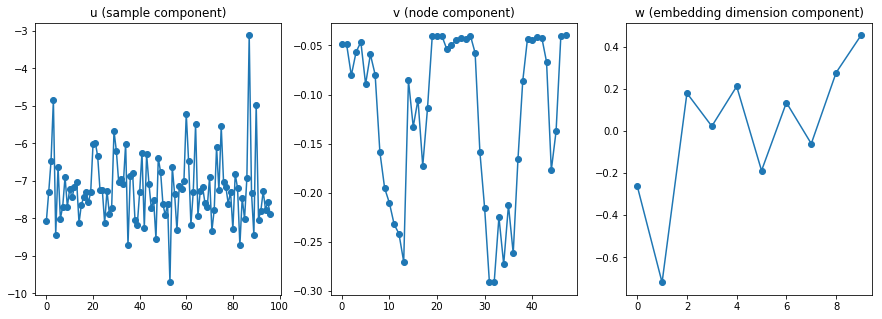

In [5]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15,5))

axes[0].set_title('u (sample component)')
axes[0].plot([row for row in range(len(factors[0]))], factors[0], '-o')

axes[1].set_title('v (node component)')
axes[1].plot([row for row in range(len(factors[1]))], factors[1], '-o')

axes[2].set_title('w (embedding dimension component)')
axes[2].plot([row for row in range(len(factors[2]))], factors[2], '-o')

plt.savefig('../../struc2vec_parafac', dpi=500)

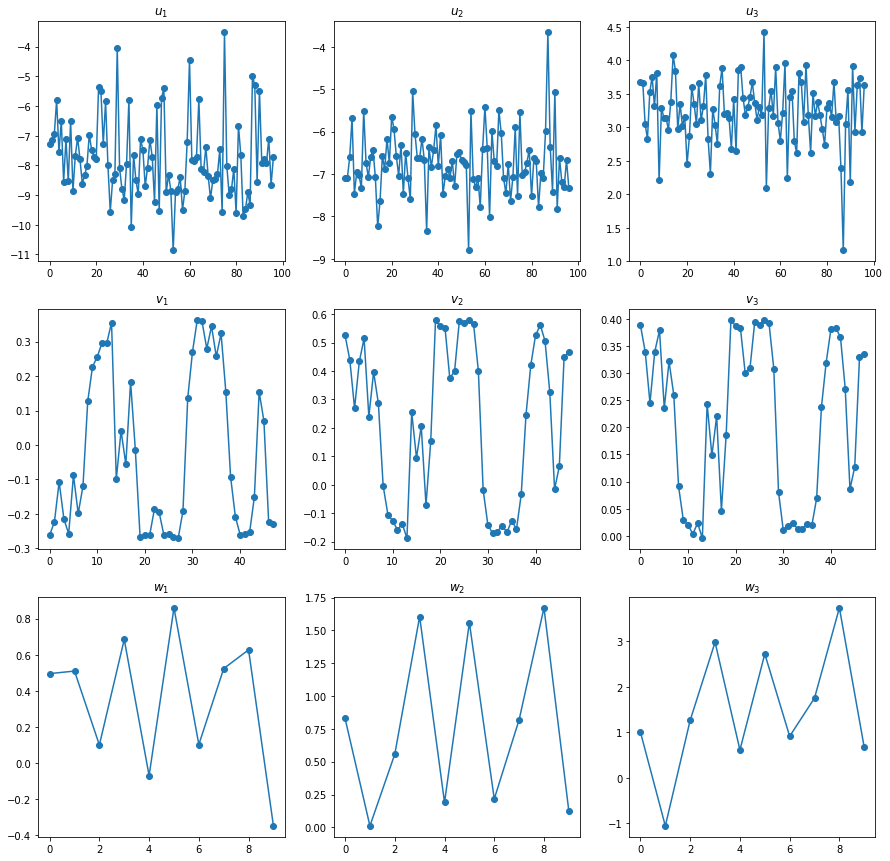

In [6]:
# Rank 2 decomposition
rank = 3
factors = parafac(data, rank=rank)

# Plot
fig, axes = plt.subplots(ncols=rank, nrows=3, figsize=(15,15))

vec = ['u','v','w']

for i in range(3):
    for j in range(rank):
        
        y = factors[i][:,j]
        x = [x for x in range(len(y))]
        
        axes[i,j].set_title(r'${}_{}$'.format(vec[i], j+1))
        axes[i,j].plot(x,y,'-o')
        
        
plt.savefig('../../struc2vec_parafac_rank-3', dpi=500)